# Predicting the sale price of bulldoxers using ML

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [2]:
#Import training and validation set of data
df=pd.read_csv('data/TrainAndValid.csv'
              ,low_memory=False)

In [3]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Exploratory Data Analysis(EDA)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [5]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

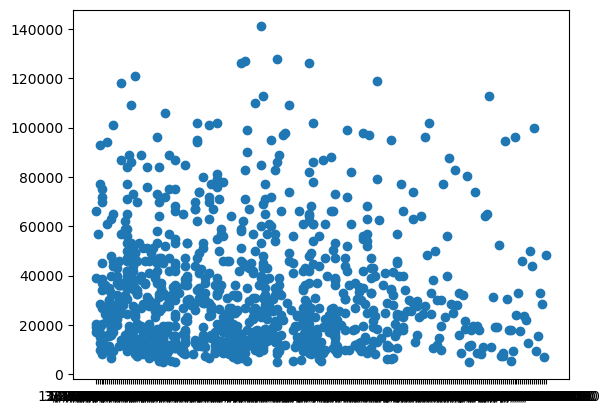

In [6]:
fig,ax= plt.subplots()
ax.scatter(df['saledate'][:1000],df['SalePrice'][:1000])
plt.show();

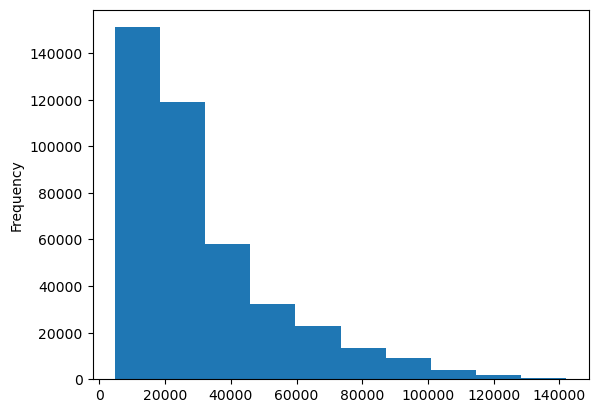

In [7]:
df.SalePrice.plot.hist()
plt.show();

### **Parsing dates**

In [8]:
df=pd.read_csv('data/TrainAndValid.csv',
              low_memory=False,
              parse_dates=['saledate'])

In [9]:
df.saledate[:10]

0   2006-11-16
1   2004-03-26
2   2004-02-26
3   2011-05-19
4   2009-07-23
5   2008-12-18
6   2004-08-26
7   2005-11-17
8   2009-08-27
9   2007-08-09
Name: saledate, dtype: datetime64[ns]

In [10]:
df.saledate.dtype

dtype('<M8[ns]')

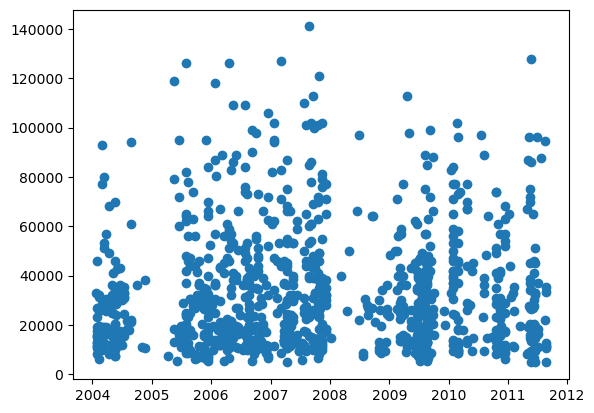

In [11]:
fig,ax=plt.subplots()
ax.scatter(df['saledate'][:1000],df['SalePrice'][:1000])
plt.show();

In [12]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


### **Sort DataFrame by saledate**

In [13]:
df.sort_values(by=['saledate'],inplace=True,
              ascending=True)
df.saledate.head(10)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
Name: saledate, dtype: datetime64[ns]

### Make a copy of the original dataframe

In [14]:
df_tmp =df.copy()
#df_tmp.saledate.head(10)

### Add datetime parameters for saledate column

In [15]:
df_tmp[:1].saledate.dt.year

205615    1989
Name: saledate, dtype: int32

In [16]:
df_tmp[:1].saledate.dt.month

205615    1
Name: saledate, dtype: int32

In [17]:
df_tmp['saleyear']=df_tmp.saledate.dt.year
df_tmp['salemonth']=df_tmp.saledate.dt.month
df_tmp['saleday']=df_tmp.saledate.dt.day
df_tmp['saledayofweek']=df_tmp.saledate.dt.dayofweek
df_tmp['saledayofyear']=df_tmp.saledate.dt.dayofyear

In [18]:
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [19]:
#Now we can remove saledate since we have enriched our data with datetime features
df_tmp.drop('saledate',axis=1,inplace=True)

In [20]:
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


In [21]:
df_tmp.state.value_counts()

state
Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virgi

# **Modelling**

### Model driven EDA

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model=RandomForestRegressor(n_jobs=-1,
                           random_state=30,low_memory=False)
model.fit(df_tmp.drop('SalePrice',axis=1),df_tmp['SalePrice']) 

**Convert string to pandas category**

In [ ]:
pd.api.types.is_object_dtype(df_tmp['UsageBand'])

In [ ]:
# Find the columns that contain string/object(Nan)

for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

In [ ]:
for label, content in df_tmp.items():
    if pd.api.types.is_object_dtype(content):
        print(label)

In [ ]:
random_dict={'k1':'hello',
             'k2':'world'}
for key, value in random_dict.items():
    print(f'is a key:{key}',
         f'is a value:{value}')
    

In [ ]:
#Convert object to category
for label, content in df_tmp.items():
    if pd.api.types.is_object_dtype(content):
        df_tmp[label]=content.astype('category').cat.as_ordered()
        

In [ ]:
df_tmp.info()

In [ ]:
df_tmp.state.cat.categories

In [ ]:
df_tmp.state.cat.codes

In [ ]:
df_tmp.isnull().sum()/len(df_tmp)

### SAVE PREPROCESSED DATA


In [ ]:
#export current temporary data frame
df_tmp.to_csv('data/train_tmp.csv',
              index=False)

In [2]:
#import preprocessed data
df_tmp =pd.read_csv('data/train_tmp.csv',
                   low_memory=False)
df_tmp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


### Fill missing data

**Missing numeric data**

In [3]:
# find which columns are numeric
for label,content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleyear
salemonth
saleday
saledayofweek
saledayofyear


In [4]:
# find which numeric column has missing data
for label,content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [5]:
# fill the missing rows with the median
for label,content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            #Add a binary column which tells us if the data was missing
            df_tmp[label+'_is_missing']=pd.isnull(content)
            #Fill them with median
            df_tmp[label]=content.fillna(content.median())

In [6]:
for label,content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

no output because we filled it with the median withthe above code

In [7]:
df_tmp.auctioneerID_is_missing.value_counts()

auctioneerID_is_missing
False    392562
True      20136
Name: count, dtype: int64

**Missing catogorical values**

In [8]:
for label,content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
         print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [9]:
pd.Categorical(df_tmp['state']).codes

array([43,  8,  8, ...,  4,  4,  4], shape=(412698,), dtype=int8)

In [10]:
for label,content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        #Add a binary column which tells us if the data was missing
        df_tmp[label+'_is_missing']=pd.isnull(content)
        #Turn categories into numbers and add +1
        df_tmp[label] = pd.Categorical(content).codes+1

In pandas categories if there is missing value it is automatically assigns that a code of negative one like below:


In [11]:
pd.Categorical(df_tmp['UsageBand']).codes

array([0, 0, 0, ..., 0, 0, 0], shape=(412698,), dtype=int8)

So we add 1 to make it zero like below:

In [12]:
pd.Categorical(df_tmp['UsageBand']).codes+1

array([1, 1, 1, ..., 1, 1, 1], shape=(412698,), dtype=int8)

In [13]:
df_tmp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,False
Blade_Type_is_missing,False,True,False,True,False
Travel_Controls_is_missing,False,True,False,True,False
Differential_Type_is_missing,True,False,True,False,True


In [14]:
df_tmp.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

### Build machine learning model

In [108]:
%%time
#Instantiate model
model=RandomForestRegressor(n_jobs=-1,
                           random_state=30)
#Fit the model
model.fit(df_tmp.drop('SalePrice',axis=1),df_tmp['SalePrice'])


CPU times: total: 40min 36s
Wall time: 12min 20s


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [109]:
#Score the model
model.score(df_tmp.drop('SalePrice',axis=1),df_tmp['SalePrice'])

0.9875893721014113

### Splitting of training and validation set

In [15]:
#Lets split based on date
df_val=df_tmp[df_tmp.saleyear == 2012]
df_train=df_tmp[df_tmp.saleyear !=2012]
len(df_val),len(df_train)

(11573, 401125)

In [16]:
# Split data in X and y
X_train,y_train=df_train.drop('SalePrice',axis=1),df_train.SalePrice
X_valid,y_valid = df_val.drop('SalePrice',axis=1),df_val.SalePrice

X_train.shape,y_train.shape,X_valid.shape,y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

### Building our own evaluation function

In [23]:
#Create evalution function(the competition uses RMSE)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error,r2_score

def rmsle(y_test,y_preds):
    '''Calculates rootmean squared log error between true and prediction labels'''
    return np.sqrt(mean_squared_log_error(y_test,y_preds))


# Create function to evaluvate model on few different levels

def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {'Training MAE': mean_absolute_error(y_train,train_preds),
             'Valid MAE': mean_absolute_error(y_valid,val_preds),
             'Training RMSLE': rmsle(y_train,train_preds),
             'Valid RMSLE': rmsle(y_valid,val_preds),
             'Training R2': r2_score(y_train,train_preds),
             'Valid R2': r2_score(y_valid,val_preds)}
    return scores

### Testing our model on a subset(to tune the hyperparameters)

*One way is*: 
   model.fit(X_train[:1000],y_train[:1000])

In [20]:
#another way
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_jobs=-1,
                           random_state=30,
                           max_samples=10000)

In [21]:
%%time
model.fit(X_train,y_train)

CPU times: total: 1min 28s
Wall time: 29.8 s


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [24]:
show_scores(model)

{'Training MAE': 5563.737955874105,
 'Valid MAE': 7163.909483280047,
 'Training RMSLE': np.float64(0.25769555852568143),
 'Valid RMSLE': np.float64(0.29312207198025075),
 'Training R2': 0.8602518849698964,
 'Valid R2': 0.8322946899430625}

### Tuning with RandomizedSearchCV

In [26]:
%%time
from sklearn.model_selection import RandomizedSearchCV

#Different model hyperparameters
rf_grid ={'n_estimators':np.arange(10,100,10),
         'max_depth':[None,3,5,10],
         'min_samples_split':np.arange(2,20,2),
         'min_samples_leaf':np.arange(1,20,2),
         'max_features': [0.5,1,'sqrt','auto'],
         'max_samples':[10000]}

rs_model=RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                 random_state=30),
                            param_distributions=rf_grid,
                           n_iter=5,cv=5,verbose=True)

#Fit the model
rs_model.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


C:\Users\USER\Desktop\regression-project\env\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
10 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\USER\Desktop\regression-project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\USER\Desktop\regression-project\env\Lib\site-packages\sklearn\base.py", line 1358, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "C:\Users\USER\Desktop\regression-pr

CPU times: total: 1min 42s
Wall time: 54.1 s


,estimator,RandomForestR...ndom_state=30)
,param_distributions,"{'max_depth': [None, 3, ...], 'max_features': [0.5, 1, ...], 'max_samples': [10000], 'min_samples_leaf': array([ 1, 3..., 15, 17, 19]), ...}"
,n_iter,5
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [27]:
rs_model.best_params_

{'n_estimators': np.int64(50),
 'min_samples_split': np.int64(4),
 'min_samples_leaf': np.int64(11),
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': 5}

In [28]:
show_scores(rs_model)

{'Training MAE': 9795.062585391699,
 'Valid MAE': 11233.257733268088,
 'Training RMSLE': np.float64(0.42074959063681),
 'Valid RMSLE': np.float64(0.4377598905508183),
 'Training R2': 0.6238938143998347,
 'Valid R2': 0.6345360625812235}

### Train the model with best params
These parameters were fount wit 100 iterations

In [31]:
%%time
## Most ideal hyperparameters
ideal_model = RandomForestRegressor(n_estimators=40,
                                   min_samples_leaf=1,
                                   min_samples_split=14,
                                   max_features=0.5,
                                   n_jobs=-1, max_samples=None,
                                   random_state=30)

#Fit the ideal model
ideal_model.fit(X_train,y_train)

CPU times: total: 7min 2s
Wall time: 2min 26s


,n_estimators,40
,criterion,'squared_error'
,max_depth,None
,min_samples_split,14
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,0.5
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [33]:
#Scores on ideal model trained on all the data
show_scores(ideal_model)

{'Training MAE': 2957.0731453277563,
 'Valid MAE': 5959.332494866222,
 'Training RMSLE': np.float64(0.14464425722527113),
 'Valid RMSLE': np.float64(0.2471300313311486),
 'Training R2': 0.9587835728782361,
 'Valid R2': 0.8817233594258804}

In [32]:
#Scores on rs model trained on only 100000 data
show_scores(rs_model)

{'Training MAE': 9795.062585391699,
 'Valid MAE': 11233.25773326809,
 'Training RMSLE': np.float64(0.42074959063681),
 'Valid RMSLE': np.float64(0.4377598905508183),
 'Training R2': 0.6238938143998347,
 'Valid R2': 0.6345360625812235}

### Let's make predictions om the test dataset 

In [35]:
#Import test data 
df_test= pd.read_csv('data/Test.csv',
                    low_memory=False, parse_dates=['saledate'])
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [45]:
#Make predictions on test
test_preds = ideal_model.predict(df_test)

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- auctioneerID_is_missing


In [37]:
df_test.isna().sum()

SalesID                         0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
YearMade                        0
MachineHoursCurrentMeter    10328
UsageBand                   10623
saledate                        0
fiModelDesc                     0
fiBaseModel                     0
fiSecondaryDesc              3975
fiModelSeries               10451
fiModelDescriptor            9433
ProductSize                  6409
fiProductClassDesc              0
state                           0
ProductGroup                    0
ProductGroupDesc                0
Drive_System                 9698
Enclosure                       2
Forks                        6149
Pad_Type                    10349
Ride_Control                 8216
Stick                       10349
Transmission                 7639
Turbocharged                10349
Blade_Extension             11806
Blade_Width                 11806
Enclosure_Type

In [38]:
df_test.columns


Index(['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID',
       'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'saledate',
       'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries',
       'fiModelDescriptor', 'ProductSize', 'fiProductClassDesc', 'state',
       'ProductGroup', 'ProductGroupDesc', 'Drive_System', 'Enclosure',
       'Forks', 'Pad_Type', 'Ride_Control', 'Stick', 'Transmission',
       'Turbocharged', 'Blade_Extension', 'Blade_Width', 'Enclosure_Type',
       'Engine_Horsepower', 'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier',
       'Tip_Control', 'Tire_Size', 'Coupler', 'Coupler_System',
       'Grouser_Tracks', 'Hydraulics_Flow', 'Track_Type',
       'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb', 'Pattern_Changer',
       'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls',
       'Differential_Type', 'Steering_Controls'],
      dtype='object')

In [39]:
X_train.columns

Index(['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID',
       'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'fiModelDesc',
       'fiBaseModel',
       ...
       'Undercarriage_Pad_Width_is_missing', 'Stick_Length_is_missing',
       'Thumb_is_missing', 'Pattern_Changer_is_missing',
       'Grouser_Type_is_missing', 'Backhoe_Mounting_is_missing',
       'Blade_Type_is_missing', 'Travel_Controls_is_missing',
       'Differential_Type_is_missing', 'Steering_Controls_is_missing'],
      dtype='object', length=102)

### Preprocesing our test data 

In [43]:
def preprocess_data(df):
    '''Performs transformation on df and returns transord=med df'''
#Fix date and time
    df['saleyear']=df.saledate.dt.year
    df['salemonth']=df.saledate.dt.month
    df['saleday']=df.saledate.dt.day
    df['saledayofweek']=df.saledate.dt.dayofweek
    df['saledayofyear']=df.saledate.dt.dayofyear
    df.drop('saledate',axis=1,inplace=True)

#Fill the numeric rows with median    
    for label,content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                #Add a binary column which tells us if the data was missing
                df[label+'_is_missing']=pd.isnull(content)
                #Fill them with median
                df[label]=content.fillna(content.median())

# Fill categorical values 
        if not pd.api.types.is_numeric_dtype(content):
            #Add a binary column which tells us if the data was missing
            df[label+'_is_missing']=pd.isnull(content)
            #Turn categories into numbers and add +1
            df[label] = pd.Categorical(content).codes+1
            
    return df

In [44]:
df_test =preprocess_data(df_test)
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [47]:
# Lets find the difference
set(X_train.columns) -set(df_test.columns)

{'auctioneerID_is_missing'}

In [48]:
#Manually adjust the missing column
df_test['auctioneerID_is_missing'] = False
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


In [50]:
X_train.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,1126363,8434,132,18.0,1974,0.0,0,4593,1744,...,True,True,True,True,True,False,False,False,True,True
1,1821514,1194089,10150,132,99.0,1980,0.0,0,1820,559,...,True,True,True,True,True,True,True,True,False,False
2,1505138,1473654,4139,132,99.0,1978,0.0,0,2348,713,...,True,True,True,True,True,False,False,False,True,True
3,1671174,1327630,8591,132,99.0,1980,0.0,0,1819,558,...,True,True,True,True,True,True,True,True,False,False
4,1329056,1336053,4089,132,99.0,1984,0.0,0,2119,683,...,True,True,True,True,True,False,False,False,True,True


In [53]:
# Ensure same features as training
df_test = df_test[X_train.columns]

# Make predictions
test_preds = ideal_model.predict(df_test)

In [54]:
test_preds

array([18188.75602511, 16530.9396343 , 49520.03715857, ...,
       12324.44419857, 17833.58180301, 26950.23771856], shape=(12457,))

In [61]:
## Format dataas asked
df_preds=pd.DataFrame()
df_preds['SalesID']=df_test['SalesID']
df_preds['SalesPrice']=test_preds
df_preds

,SalesID,SalesPrice
0,1227829,18188.756025
1,1227844,16530.939634
2,1227847,49520.037159
3,1227848,70226.998419
4,1227863,58881.527482
...,...,...
12452,6643171,43449.980803
12453,6643173,11677.169523
12454,6643184,12324.444199
12455,6643186,17833.581803


In [63]:
#Export predictions
df_preds.to_csv('data/test_predictions.csv',index=False)

### Feature Importance

In [65]:
len(ideal_model.feature_importances_)

102

In [66]:
X_train.shape

(401125, 102)

In [80]:
# Helper function for plotting feature importance
def plot_features(columns,importances,n=20):
    df=(pd.DataFrame({'features':columns,
                      'feature_importances':importances})
        .sort_values('feature_importances',ascending=False)
        .reset_index(drop=True))
     #PLot the dataframe
    fig,ax=plt.subplots()
    ax.barh(df['features'][:n],df['feature_importances'][:20])
    ax.set_ylabel('Features')
    ax.set_xlabel('Feature importance')
    ax.invert_yaxis()

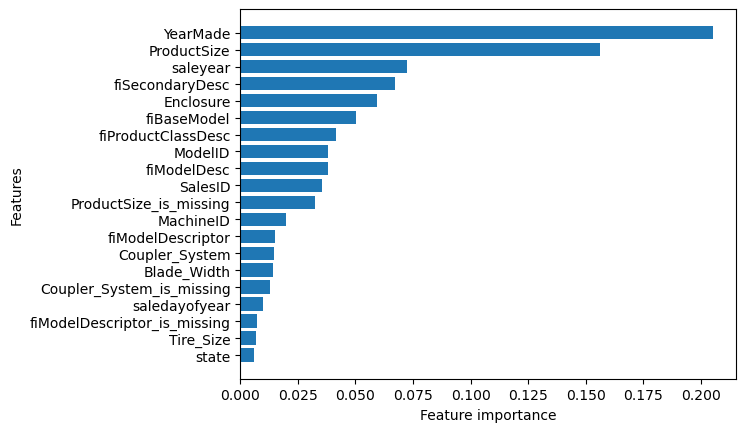

In [81]:
plot_features(X_train.columns,ideal_model.feature_importances_)
plt.show();